In [86]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np
import plotly.io as pio
import plotly.figure_factory as ff
from mplsoccer import Pitch
import seaborn as sns

In [5]:
base_url = 'https://understat.com/match/'
match = str(input('Please enter the match id: '))
url = base_url + match

Please enter the match id: 21992


In [6]:
url

'https://understat.com/match/21992'

In [7]:
res = requests.get(url)
soup = BeautifulSoup(res.content, 'lxml')
scripts = soup.find_all('script')

In [8]:
scripts

[<script>
 			var THEME = localStorage.getItem("theme") || 'DARK';
 			document.body.className = "theme-" + THEME.toLowerCase();
 		</script>,
 <script>
 	var shotsData 	= JSON.parse('\x7B\x22h\x22\x3A\x5B\x7B\x22id\x22\x3A\x22546192\x22,\x22minute\x22\x3A\x221\x22,\x22result\x22\x3A\x22SavedShot\x22,\x22X\x22\x3A\x220.8490000152587891\x22,\x22Y\x22\x3A\x220.49\x22,\x22xG\x22\x3A\x220.07894284278154373\x22,\x22player\x22\x3A\x22Scott\x20McTominay\x22,\x22h_a\x22\x3A\x22h\x22,\x22player_id\x22\x3A\x225560\x22,\x22situation\x22\x3A\x22OpenPlay\x22,\x22season\x22\x3A\x222023\x22,\x22shotType\x22\x3A\x22LeftFoot\x22,\x22match_id\x22\x3A\x2221992\x22,\x22h_team\x22\x3A\x22Manchester\x20United\x22,\x22a_team\x22\x3A\x22Manchester\x20City\x22,\x22h_goals\x22\x3A\x220\x22,\x22a_goals\x22\x3A\x223\x22,\x22date\x22\x3A\x222023\x2D10\x2D29\x2015\x3A30\x3A00\x22,\x22player_assisted\x22\x3A\x22Rasmus\x20H\x5Cu00f8jlund\x22,\x22lastAction\x22\x3A\x22Pass\x22\x7D,\x7B\x22id\x22\x3A\x22546197\x22,\x22

In [9]:
strings = scripts[1].string

In [10]:
strings

"\n\tvar shotsData \t= JSON.parse('\\x7B\\x22h\\x22\\x3A\\x5B\\x7B\\x22id\\x22\\x3A\\x22546192\\x22,\\x22minute\\x22\\x3A\\x221\\x22,\\x22result\\x22\\x3A\\x22SavedShot\\x22,\\x22X\\x22\\x3A\\x220.8490000152587891\\x22,\\x22Y\\x22\\x3A\\x220.49\\x22,\\x22xG\\x22\\x3A\\x220.07894284278154373\\x22,\\x22player\\x22\\x3A\\x22Scott\\x20McTominay\\x22,\\x22h_a\\x22\\x3A\\x22h\\x22,\\x22player_id\\x22\\x3A\\x225560\\x22,\\x22situation\\x22\\x3A\\x22OpenPlay\\x22,\\x22season\\x22\\x3A\\x222023\\x22,\\x22shotType\\x22\\x3A\\x22LeftFoot\\x22,\\x22match_id\\x22\\x3A\\x2221992\\x22,\\x22h_team\\x22\\x3A\\x22Manchester\\x20United\\x22,\\x22a_team\\x22\\x3A\\x22Manchester\\x20City\\x22,\\x22h_goals\\x22\\x3A\\x220\\x22,\\x22a_goals\\x22\\x3A\\x223\\x22,\\x22date\\x22\\x3A\\x222023\\x2D10\\x2D29\\x2015\\x3A30\\x3A00\\x22,\\x22player_assisted\\x22\\x3A\\x22Rasmus\\x20H\\x5Cu00f8jlund\\x22,\\x22lastAction\\x22\\x3A\\x22Pass\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x22546197\\x22,\\x22minute\\x22\\x3A\\x2230\\

In [11]:
ind_start = strings.index("('")+2
ind_end = strings.index("')")

json_data = strings[ind_start:ind_end]
json_data = json_data.encode('utf8').decode('unicode_escape')

data = json.loads(json_data)

In [12]:
data

{'h': [{'id': '546192',
   'minute': '1',
   'result': 'SavedShot',
   'X': '0.8490000152587891',
   'Y': '0.49',
   'xG': '0.07894284278154373',
   'player': 'Scott McTominay',
   'h_a': 'h',
   'player_id': '5560',
   'situation': 'OpenPlay',
   'season': '2023',
   'shotType': 'LeftFoot',
   'match_id': '21992',
   'h_team': 'Manchester United',
   'a_team': 'Manchester City',
   'h_goals': '0',
   'a_goals': '3',
   'date': '2023-10-29 15:30:00',
   'player_assisted': 'Rasmus Højlund',
   'lastAction': 'Pass'},
  {'id': '546197',
   'minute': '30',
   'result': 'MissedShots',
   'X': '0.9619999694824218',
   'Y': '0.3629999923706055',
   'xG': '0.12603659927845',
   'player': 'Bruno Fernandes',
   'h_a': 'h',
   'player_id': '1228',
   'situation': 'OpenPlay',
   'season': '2023',
   'shotType': 'RightFoot',
   'match_id': '21992',
   'h_team': 'Manchester United',
   'a_team': 'Manchester City',
   'h_goals': '0',
   'a_goals': '3',
   'date': '2023-10-29 15:30:00',
   'player_ass

In [39]:
x = []
y = []
xg = []
minute = []
player = []
team = []
result = []
situation = []
shotType = []

data_away = data['a']
data_home = data['h']

for index in range(len(data_home)):
    for key in data_home[index]:
        if key == 'X':
            x.append(data_home[index][key])
        if key == 'Y':
            y.append(data_home[index][key])
        if key == 'xG':
            xg.append(data_home[index][key])
        if key == 'minute':
            minute.append(data_home[index][key])
        if key == 'player':
            player.append(data_home[index][key])
        if key == 'h_team':
            team.append(data_home[index][key])
        if key == 'result':
            result.append(data_home[index][key])
        if key == 'situation':
            situation.append(data_home[index][key])
        if key == 'shotType':
            shotType.append(data_home[index][key])
            
for index in range(len(data_away)):
    for key in data_away[index]:
        if key == 'X':
            x.append(data_away[index][key])
        if key == 'Y':
            y.append(data_away[index][key])
        if key == 'xG':
            xg.append(data_away[index][key])
        if key == 'minute':
            minute.append(data_away[index][key])
        if key == 'player':
            player.append(data_away[index][key])
        if key == 'a_team':
            team.append(data_away[index][key])
        if key == 'result':
            result.append(data_away[index][key])
        if key == 'situation':
            situation.append(data_away[index][key])
        if key == 'shotType':
            shotType.append(data_away[index][key])

In [40]:
col_names = ['x', 'y', 'xg', 'minute', 'player', 'team',
             'result', 'situation', 'shotType']
df = pd.DataFrame([x, y, xg, minute, player, team, result, situation, shotType], index=col_names)
df = df.T

In [41]:
df.head(1)

,x,y,xg,minute,player,team,result,situation,shotType
0,0.8490000152587891,0.49,0.07894284278154373,1,Scott McTominay,Manchester United,SavedShot,OpenPlay,LeftFoot


In [42]:
df['x'] = df['x'].astype(float)
df['y'] = df['y'].astype(float)
df['xg'] = df['xg'].astype(float).round(2)
df['minute'] = df['minute'].astype(int)
df['player'] = df['player'].astype("string")
df['team'] = df['team'].astype("string")
df['result'] = df['result'].astype("string")
df['situation'] = df['situation'].astype("string")
df['shotType'] = df['shotType'].astype("string")

In [43]:
df

,x,y,xg,minute,player,team,result,situation,shotType
0,0.849,0.490,0.08,1,Scott McTominay,Manchester United,SavedShot,OpenPlay,LeftFoot
1,0.962,0.363,0.13,30,Bruno Fernandes,Manchester United,MissedShots,OpenPlay,RightFoot
2,0.840,0.502,0.06,45,Scott McTominay,Manchester United,SavedShot,OpenPlay,RightFoot
3,0.896,0.524,0.02,47,Harry Maguire,Manchester United,MissedShots,FromCorner,Head
4,0.772,0.693,0.02,47,Bruno Fernandes,Manchester United,SavedShot,FromCorner,RightFoot
5,0.931,0.430,0.36,68,Marcus Rashford,Manchester United,MissedShots,OpenPlay,RightFoot
6,0.864,0.517,0.05,84,Christian Eriksen,Manchester United,BlockedShot,FromCorner,RightFoot
7,0.935,0.411,0.33,7,Phil Foden,Manchester City,SavedShot,OpenPlay,Head
8,0.816,0.476,0.05,15,Rodri,Manchester City,MissedShots,OpenPlay,RightFoot
9,0.838,0.742,0.02,19,Jack Grealish,Manchester City,MissedShots,FromCorner,RightFoot


In [44]:
df.dtypes

x            float64
y            float64
xg           float64
minute         int32
player        string
team          string
result        string
situation     string
shotType      string
dtype: object

In [45]:
df

,x,y,xg,minute,player,team,result,situation,shotType
0,0.849,0.490,0.08,1,Scott McTominay,Manchester United,SavedShot,OpenPlay,LeftFoot
1,0.962,0.363,0.13,30,Bruno Fernandes,Manchester United,MissedShots,OpenPlay,RightFoot
2,0.840,0.502,0.06,45,Scott McTominay,Manchester United,SavedShot,OpenPlay,RightFoot
3,0.896,0.524,0.02,47,Harry Maguire,Manchester United,MissedShots,FromCorner,Head
4,0.772,0.693,0.02,47,Bruno Fernandes,Manchester United,SavedShot,FromCorner,RightFoot
5,0.931,0.430,0.36,68,Marcus Rashford,Manchester United,MissedShots,OpenPlay,RightFoot
6,0.864,0.517,0.05,84,Christian Eriksen,Manchester United,BlockedShot,FromCorner,RightFoot
7,0.935,0.411,0.33,7,Phil Foden,Manchester City,SavedShot,OpenPlay,Head
8,0.816,0.476,0.05,15,Rodri,Manchester City,MissedShots,OpenPlay,RightFoot
9,0.838,0.742,0.02,19,Jack Grealish,Manchester City,MissedShots,FromCorner,RightFoot


In [46]:
df['x'] = df['x']*100
df['y'] = df['y']*100 #*1.01*1.01*1.01*1.01

In [48]:
df['x'] = df['x'].round(2)
df['y'] = df['y'].round(2)

In [49]:
df

,x,y,xg,minute,player,team,result,situation,shotType
0,84.9,49.0,0.08,1,Scott McTominay,Manchester United,SavedShot,OpenPlay,LeftFoot
1,96.2,36.3,0.13,30,Bruno Fernandes,Manchester United,MissedShots,OpenPlay,RightFoot
2,84.0,50.2,0.06,45,Scott McTominay,Manchester United,SavedShot,OpenPlay,RightFoot
3,89.6,52.4,0.02,47,Harry Maguire,Manchester United,MissedShots,FromCorner,Head
4,77.2,69.3,0.02,47,Bruno Fernandes,Manchester United,SavedShot,FromCorner,RightFoot
5,93.1,43.0,0.36,68,Marcus Rashford,Manchester United,MissedShots,OpenPlay,RightFoot
6,86.4,51.7,0.05,84,Christian Eriksen,Manchester United,BlockedShot,FromCorner,RightFoot
7,93.5,41.1,0.33,7,Phil Foden,Manchester City,SavedShot,OpenPlay,Head
8,81.6,47.6,0.05,15,Rodri,Manchester City,MissedShots,OpenPlay,RightFoot
9,83.8,74.2,0.02,19,Jack Grealish,Manchester City,MissedShots,FromCorner,RightFoot


In [53]:
df.loc[df['team'] == "Manchester City", 'x'] = 100 - df['x']

In [54]:
df.loc[df['team'] == "Manchester City", 'y'] = 100 - df['y']

In [126]:
df

,x,y,xg,minute,player,team,result,situation,shotType
0,84.9,49.0,0.08,1,Scott McTominay,Manchester United,SavedShot,OpenPlay,LeftFoot
1,96.2,36.3,0.13,30,Bruno Fernandes,Manchester United,MissedShots,OpenPlay,RightFoot
2,84.0,50.2,0.06,45,Scott McTominay,Manchester United,SavedShot,OpenPlay,RightFoot
3,89.6,52.4,0.02,47,Harry Maguire,Manchester United,MissedShots,FromCorner,Head
4,77.2,69.3,0.02,47,Bruno Fernandes,Manchester United,SavedShot,FromCorner,RightFoot
5,93.1,43.0,0.36,68,Marcus Rashford,Manchester United,MissedShots,OpenPlay,RightFoot
6,86.4,51.7,0.05,84,Christian Eriksen,Manchester United,BlockedShot,FromCorner,RightFoot
7,6.5,58.9,0.33,7,Phil Foden,Manchester City,SavedShot,OpenPlay,Head
8,18.4,52.4,0.05,15,Rodri,Manchester City,MissedShots,OpenPlay,RightFoot
9,16.2,25.8,0.02,19,Jack Grealish,Manchester City,MissedShots,FromCorner,RightFoot


In [161]:
from io import BytesIO
import base64
import mplleaflet
import mplsoccer
from matplotlib.patches import Patch

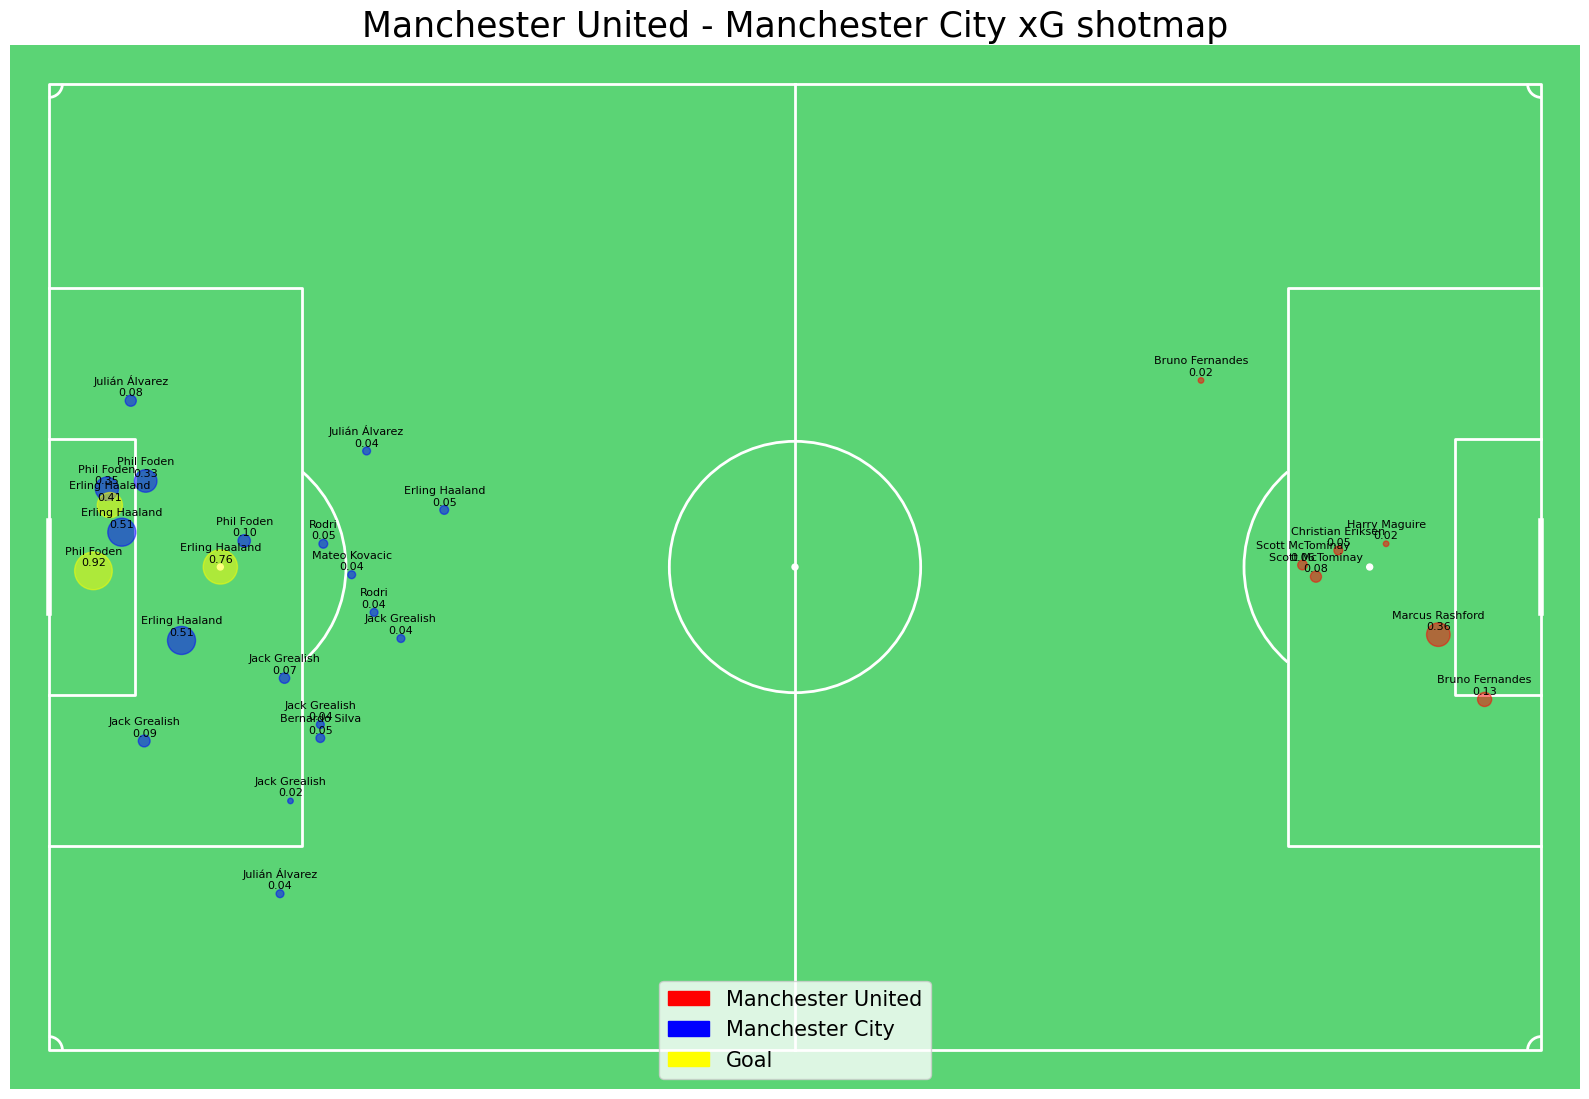

In [167]:
pitch = mplsoccer.Pitch(pitch_type='opta', pitch_color='#5bd475', line_color='white', stripe=False, corner_arcs=True, linewidth=2)

# Рисуем футбольное поле
fig, ax = pitch.draw(figsize=(16, 11))

colors = df['team'].map({'Manchester United': 'red', 'Manchester City': 'blue'})
goal_colors = df['result'].map({'Goal': 'yellow', 'Miss': 'gray'})
colors = [goal_colors[i] if result == 'Goal' else team_color for i, (result, team_color) in enumerate(zip(df['result'], colors))]

# Наносим точки на футбольное поле
scatter = pitch.scatter(ax=ax, x=df['x'], y=df['y'], s=df['xg'] * 800, c=colors, alpha=0.5, label=None)

# Добавляем аннотации 
for i, (player, xg_value) in enumerate(zip(df['player'], df['xg'])):
    ax.annotate(f'{player}\n{xg_value:.2f}', (df['x'].iloc[i], df['y'].iloc[i]), fontsize=8, ha='center', va='bottom', xytext=(0, 2), textcoords='offset points')

# 
legend_elements = [Patch(color='red', label='Manchester United'),
                   Patch(color='blue', label='Manchester City'),
                  Patch(color='yellow', label='Goal')]

ax.legend(handles=legend_elements, loc='lower center', fontsize=15)

ax.set_title('Manchester United - Manchester City xG shotmap', fontsize=25, color='black')


# Отображаем график
plt.show()